<center> DBMS - Exploratory Analysis </center>

Source: https://www.kaggle.com/datasets/ravivarmaodugu/databases-dbms-2024/data <br>
The DB-Engines Ranking ranks database management systems according to their popularity. The ranking is updated monthly. <br>

The Databases_DBMS_2024 dataset provides information about leading databases with a worldwide footprint. The original dataframe was obtained from the DB-Engines website: https://db-engines.com/en/ <br>


Date of collect of this datasource: April, 23, 2024.


1. Loading the libraries into the environment:

In [47]:
import numpy as np                             ## Used to calculates math formulas over the data
import pandas as pd                            ## Used for data analysis and manipulation
import matplotlib.pyplot as plt                       ## Used to created visualizations.
import seaborn as sns                          ## Used to draw informative statistical graphics.
import platform                                ## Used to access underlying platform's identifying data.
from textwrap import wrap                      ## Used to modify strings / column names 
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import prince
import statsmodels.api as sm
from scipy.stats import chi2_contingency


2. Detailing the version's used:



In [3]:
print("Numpy - ", np.__version__)
print("Pandas - ", pd.__version__)
print("Seaborn - ", sns.__version__)
print("Plataform - ", platform.__version__)
print("Python - ", platform.python_version())

Numpy -  1.26.4
Pandas -  2.2.1
Seaborn -  0.13.2
Plataform -  1.0.8
Python -  3.12.1


3. Loading the dataset into the environment.

In [4]:
df = pd.read_csv("Databases_DBMS_2024.csv", encoding='latin-1')


In [5]:
pd.set_option('display.max_columns', None)
df.head(5)

,Sno,DBMS,Vendor_Name,Vendor_Country,DBMS_Type,Multi_model_capability,Score_Feb_2024,Score_Jan_2024,Score_Feb_2023,Rank_Feb_2024,Rank_Jan_2024,Rank_Feb_2023
0,1,Oracle,Oracle Corporation,United States,Relational,Yes,1241.45,-6.05,-6.08,1,1.0,1.0
1,2,MySQL,Oracle Corporation,United States,Relational,Yes,1106.67,-16.79,-88.78,2,2.0,2.0
2,3,Microsoft SQL Server,Microsoft Corporation,United States,Relational,Yes,853.57,-23.03,-75.52,3,3.0,3.0
3,4,PostgreSQL,PostgreSQL Global Development Group,United States,Relational,Yes,629.41,-19.55,12.9,4,4.0,4.0
4,5,MongoDB,"MongoDB, Inc.",United States,Document,Yes,420.36,2.88,-32.41,5,5.0,5.0


4. Variable Analysis: <br>

**Sno** - Identifier for all entries (index). Only used to count. <br>
**DBMS** - Categorical value, can be used to count, mode or frequency. <br>
**Vendor_Name** - Categorical value, can be used to count, mode or frequency. <br>
**Vendor_country** - Categorical value, can be used to count, mode or frequency.<br>
**DBMS_Type** - Categorical value, can be used to count, mode or frequency. <br>
**Multi_model_capability** - Binary/Categorical value, with the options - Yes or No. Can be used to count, mode or frequency. <br>
**Score_feb_2024** - Numeric value, can be used with mean, std, min, max, frequency, mode, etc. <br>
**Score_Jan_2023** - Numeric value, can be used with mean, std, min, max, frequency, mode, etc. <br>
**Score_feb_2023** - Numeric value, can be used with mean, std, min, max, frequency, mode, etc. <br>
**Rank_Feb_2024** - Ordered variable, only used to count. <br>
**Rank_Jan_2024** - Ordered variable, only used to count. <br>
**Rank_Feb_2023** - Ordered variable, only used to count. <br>

5. Exploring the datasets / Stastistical overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sno                     417 non-null    int64  
 1   DBMS                    417 non-null    object 
 2   Vendor_Name             417 non-null    object 
 3   Vendor_Country          417 non-null    object 
 4   DBMS_Type               417 non-null    object 
 5   Multi_model_capability  417 non-null    object 
 6   Score_Feb_2024          417 non-null    float64
 7   Score_Jan_2024          403 non-null    object 
 8   Score_Feb_2023          389 non-null    object 
 9   Rank_Feb_2024           417 non-null    int64  
 10  Rank_Jan_2024           416 non-null    float64
 11  Rank_Feb_2023           399 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 39.2+ KB


After this print, it is possible to see that the column 9 - **Rank_Feb_2024** is defined with int64 type, different from similar column 10 - **Rank_Jan_2024** and column 11 - **Rank_Feb_2023** <br>

In this case, change the type of column 9 to float so it will be at the same type.

In [7]:
df = df.astype({"Rank_Feb_2024": float})

In [8]:
df['Rank_Feb_2024'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 417 entries, 0 to 416
Series name: Rank_Feb_2024
Non-Null Count  Dtype  
--------------  -----  
417 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


The values for Score_Jan_2024 and Score_Feb_2023 are defined as "object" based on the output for df.info() command. But, based on the df.head(5), we can confirm the values are numeric. Let's take a look if we could see the issue:

In [9]:
df['Score_Jan_2024'].unique()

array(['-6.05', '-16.79', '-23.03', '-19.55', '2.88', '1.33', '-0.33',
       '-0.18', '1.53', '2.08', '-4.5', '-1.77', '-2', '-1.07', '1.96',
       '-1.51', '-3.62', '-1.15', '0.15', '-1.94', '-1.56', '-1.57',
       '-1.22', '-0.53', '-0.09', '0.09', '-1.48', '0.92', '-0.78',
       '-1.27', '-2.07', '0.42', '0.12', '-0.71', '0.71', '0.63', '-0.66',
       '-0.29', '-0.74', '0.88', '0.57', '-0.1', '-0.7', '-0.45', '-0.77',
       '-0.27', '-0.25', '0.18', '-0.42', '-0.34', '0.04', '0.3', '-0.13',
       '-0.15', '-0.65', '0.33', '0.22', '0.02', '-0.03', '-0.11',
       '-0.01', '-0.22', '0.37', '0.23', '0.29', '-0.41', '0.5', '0.11',
       '0.13', '-0.07', '-0.28', '0.01', '-0.62', '-0.02', '-0.4', '1.44',
       '0.14', '-0.19', '0.08', '-0.14', '-0.55', '-0.59', '0.16',
       '-0.39', '0.24', '-0.21', '-0.12', '0.06', nan, '-0.05', '-0.04',
       '0.1', '-0.06', '-0.2', '-0.26', '0.05', '-0.24', '0.07', '-0.16',
       '-0.08', '-0.35', '0.03', '-0.23', '-0.17', '-0.3', '0.17',

The df.unique() command prompt to use that there are something strange. There are some values with the chracter ±. It is not an error, it is the caracterisct of the values. This value is calculated based on the previous month and current month value. In that case, let's replace the ±0.00 to 0.00 <br>

I created a function called changetype


In [10]:
def changetype(df, column):
    df[column] = df[column].replace(to_replace='±', value='', regex=True).astype(float).round(2)

In [11]:
changetype(df, 'Score_Jan_2024')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sno                     417 non-null    int64  
 1   DBMS                    417 non-null    object 
 2   Vendor_Name             417 non-null    object 
 3   Vendor_Country          417 non-null    object 
 4   DBMS_Type               417 non-null    object 
 5   Multi_model_capability  417 non-null    object 
 6   Score_Feb_2024          417 non-null    float64
 7   Score_Jan_2024          403 non-null    float64
 8   Score_Feb_2023          389 non-null    object 
 9   Rank_Feb_2024           417 non-null    float64
 10  Rank_Jan_2024           416 non-null    float64
 11  Rank_Feb_2023           399 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 39.2+ KB


Doing the same thing with the Score_Feb_2023 column:


In [13]:
df['Score_Feb_2023'].unique()

array(['-6.08', '-88.78', '-75.52', '12.9', '-32.41', '-13.12', '-2.86',
       '-10.74', '11.8', '-15.38', '-17.86', '-6.95', '0.42', '4.57',
       '3.21', '0.81', '16.58', '-6.31', '11.17', '-11.79', '-2.32',
       '-8.82', '-4.45', '-1.28', '-3.71', '-4.46', '-4.52', '-0.96',
       '-3.93', '3.23', '2.33', '0.69', '-0.9', '-4.38', '-2.75', '0.05',
       '2.69', '-2.14', '-2.77', '4.34', nan, '0.01', '-0.78', '-1.77',
       '-4.95', '-4.3', '-0.64', '-0.31', '-0.95', '1.55', '0.03', '0.97',
       '-0.93', '-0.37', '-0.28', '-0.56', '-1.32', '-1.35', '0.53',
       '-0.45', '-0.62', '-0.67', '-0.55', '-1.13', '-0.25', '-0.08',
       '-0.14', '-0.26', '1.11', '-0.32', '-0.79', '-1.61', '0.09',
       '0.33', '-1.66', '1.84', '-0.21', '2.53', '0.06', '-1.09', '-0.85',
       '-1.54', '-1.75', '1.21', '1.16', '-0.27', '-0.76', '-0.89',
       '-0.23', '-0.04', '0.94', '-1.11', '2.08', '-1.01', '0.84', '1.49',
       '-0.33', '0.08', '-1.24', '0.21', '0.2', '-0.63', '-0.05', '-0.42

In [14]:
changetype(df, 'Score_Feb_2023')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sno                     417 non-null    int64  
 1   DBMS                    417 non-null    object 
 2   Vendor_Name             417 non-null    object 
 3   Vendor_Country          417 non-null    object 
 4   DBMS_Type               417 non-null    object 
 5   Multi_model_capability  417 non-null    object 
 6   Score_Feb_2024          417 non-null    float64
 7   Score_Jan_2024          403 non-null    float64
 8   Score_Feb_2023          389 non-null    float64
 9   Rank_Feb_2024           417 non-null    float64
 10  Rank_Jan_2024           416 non-null    float64
 11  Rank_Feb_2023           399 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 39.2+ KB


Now all the columns with numeric values were corrected with corresponding types.

6. Getting more information about the dataframe


In [16]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Number of missing values:", sum(df.isna().sum()))

Number of rows: 417
Number of columns: 12
Number of missing values: 61


7. Detailing more about the missing values


In [17]:
df.isnull().sum()

Sno                        0
DBMS                       0
Vendor_Name                0
Vendor_Country             0
DBMS_Type                  0
Multi_model_capability     0
Score_Feb_2024             0
Score_Jan_2024            14
Score_Feb_2023            28
Rank_Feb_2024              0
Rank_Jan_2024              1
Rank_Feb_2023             18
dtype: int64

It is possible to check some missing values at the Columns: Score_Jan_2024, Score_Feb_2023, Rank_Jan_2024,  Rank_Feb_2023. <br>

For the Numeric variables - Score_Jan_2024 and Score_Feb_2023 - NaN values will be replaced by the mean

For that case, I created an function called replacenavalues:

In [18]:
def replacenavalues(df, column):
    df[column] = df[column].fillna(value=df[column].mean())

In [19]:
print("The Value of mean of column Score_Jan_2024 is:", df['Score_Jan_2024'].mean().round(2))

The Value of mean of column Score_Jan_2024 is: -0.28


In [20]:
#Replacing the NaN values with the mean
replacenavalues(df, 'Score_Jan_2024')

In [21]:
df.isnull().sum()

Sno                        0
DBMS                       0
Vendor_Name                0
Vendor_Country             0
DBMS_Type                  0
Multi_model_capability     0
Score_Feb_2024             0
Score_Jan_2024             0
Score_Feb_2023            28
Rank_Feb_2024              0
Rank_Jan_2024              1
Rank_Feb_2023             18
dtype: int64

In [22]:
print("The Value of mean of column Score_Feb_2024 is:", df['Score_Feb_2023'].mean().round(2))

The Value of mean of column Score_Feb_2024 is: -0.79


In [23]:
#Replacing the NaN values with the mean
replacenavalues(df, 'Score_Feb_2023')

In [24]:
df.isnull().sum()

Sno                        0
DBMS                       0
Vendor_Name                0
Vendor_Country             0
DBMS_Type                  0
Multi_model_capability     0
Score_Feb_2024             0
Score_Jan_2024             0
Score_Feb_2023             0
Rank_Feb_2024              0
Rank_Jan_2024              1
Rank_Feb_2023             18
dtype: int64

Reffering to the columns Rank_Jan_2024, Rank_Feb_2023 with NAN values, based on the variable analysis, this type of column can be removed because it will not be useful for the EDA. Next step is to remove them

In [25]:
df.drop(columns=['Rank_Jan_2024','Rank_Feb_2023'], inplace=True)

In [26]:
df.head(10)

,Sno,DBMS,Vendor_Name,Vendor_Country,DBMS_Type,Multi_model_capability,Score_Feb_2024,Score_Jan_2024,Score_Feb_2023,Rank_Feb_2024
0,1,Oracle,Oracle Corporation,United States,Relational,Yes,1241.45,-6.05,-6.08,1.0
1,2,MySQL,Oracle Corporation,United States,Relational,Yes,1106.67,-16.79,-88.78,2.0
2,3,Microsoft SQL Server,Microsoft Corporation,United States,Relational,Yes,853.57,-23.03,-75.52,3.0
3,4,PostgreSQL,PostgreSQL Global Development Group,United States,Relational,Yes,629.41,-19.55,12.90,4.0
4,5,MongoDB,"MongoDB, Inc.",United States,Document,Yes,420.36,2.88,-32.41,5.0
5,6,Redis,Redis Labs,United States,Key-value,Yes,160.71,1.33,-13.12,6.0
6,7,Elasticsearch,Elastic,United States,Search engine,Yes,135.74,-0.33,-2.86,7.0
7,8,IBM Db2,IBM,United States,Relational,Yes,132.23,-0.18,-10.74,8.0
8,9,Snowflake,Snowflake Inc.,United States,Relational,No,127.45,1.53,11.80,9.0
9,10,SQLite,D. Richard Hipp,United States,Relational,No,117.28,2.08,-15.38,10.0


After some data transformation, let's do some evaluation. 
For a company, it is very important during the decision to use a DBMS, understading and verifying if your product needs a specific DBMS_type, if the selected one is scalable, popular in the market, with good support, etc. 

Let's do some analysis by the DBMS Type


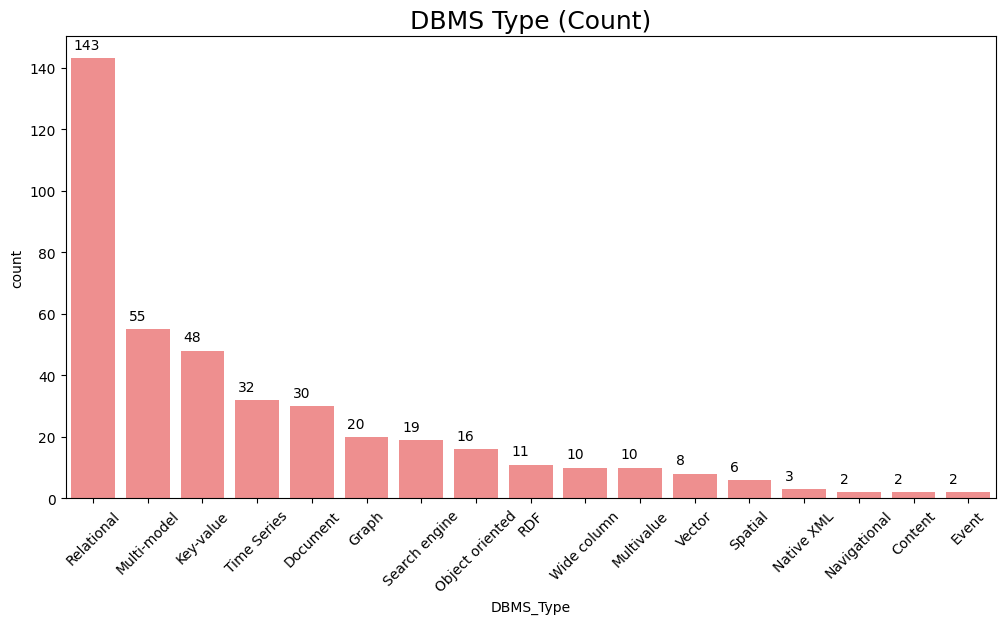

In [27]:
plt.figure(figsize=(12,6))

plt.title("DBMS Type (Count)", color='black', fontsize=18,)
ax = sns.countplot(x='DBMS_Type', data=df, alpha=0.5, order=df['DBMS_Type'].value_counts().index, color='red')

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3)) 
plt.xticks(rotation=45);

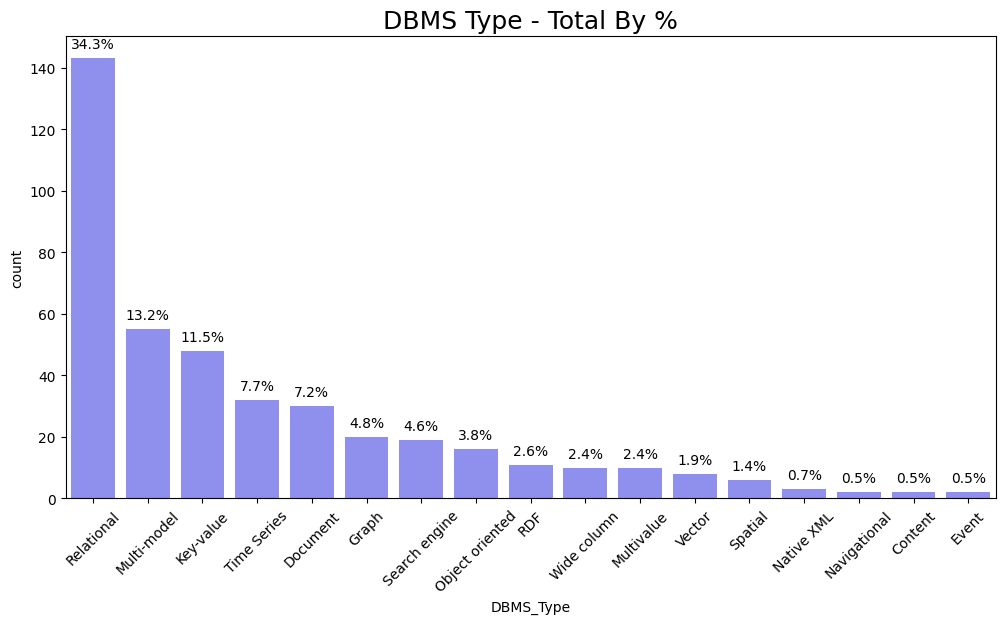

In [28]:
total = float(len(df['DBMS_Type']))

plt.figure(figsize=(12,6))

plt.title("DBMS Type - Total By %", color='black', fontsize=18,)
ax = sns.countplot(x='DBMS_Type', data=df, alpha=0.5, order=df['DBMS_Type'].value_counts().index, color='blue')

for p in ax.patches: 
        height = p.get_height()
        percentage = '{:.1f}%'.format((height/total)*100)
        ax.annotate(percentage, (p.get_x()+p.get_width()/2., height), ha="center", va="bottom", fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45);

We could observe:

- Relational Database is the dominant and it represents 34.3% of the total


How much each country represents in % of the total?

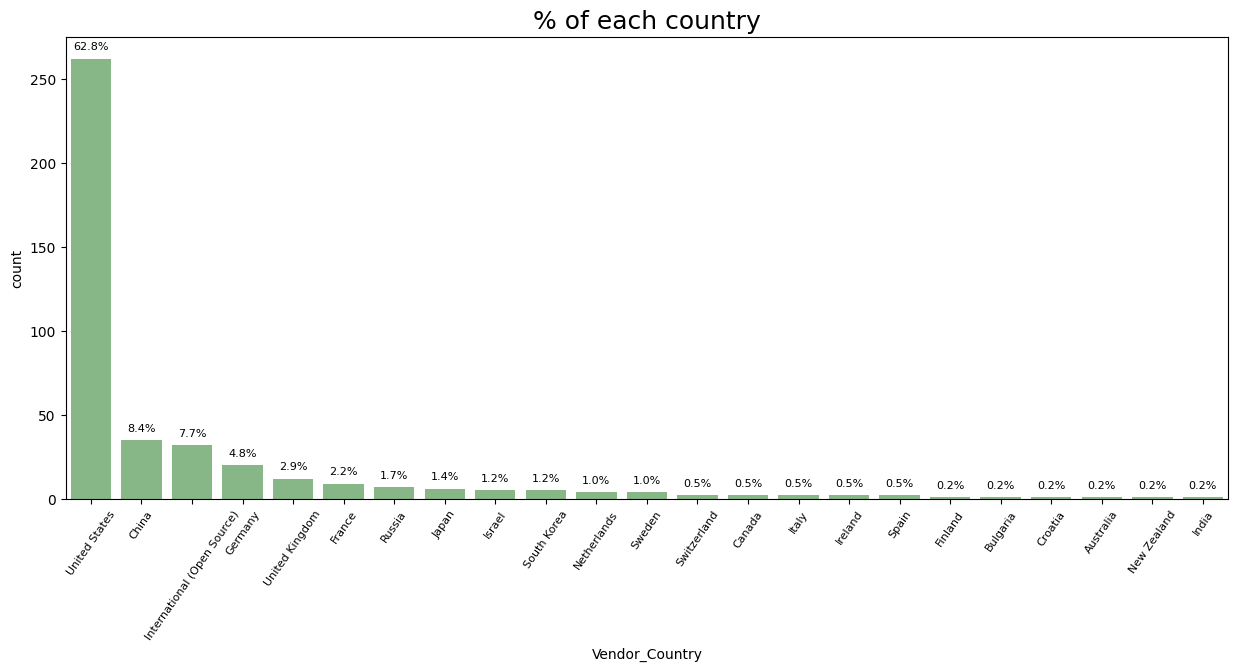

In [29]:
plt.figure(figsize=(15,6))

plt.title("% of each country", color='black', fontsize=18,)
ax = sns.countplot(x='Vendor_Country', data=df, alpha=0.5, order=df['Vendor_Country'].value_counts().index, color='green')

for p in ax.patches: 
        height = p.get_height()
        percentage = '{:.1f}%'.format((height/total)*100)
        ax.annotate(percentage, (p.get_x()+p.get_width()/2., height), ha="center", va="bottom", fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

#Labels in X axis will have an enter in every space
df['Vendor_Country'] = ['\n'.join(wrap(x, 14)) for x in  df['Vendor_Country']]
plt.xticks(rotation=55, fontsize=8);


US dominates the world of DBMS - more than 60% of the DBMS are original from US.

Now with the image of these two graphs, it is possible to see US as the main country related to DBMS. Lets deep dive in there!.-- The Score of 


-- Which is the most used DBMS type in US? <br>
-- Which is the most popular vendor in US? <br>

To discover which is the most used DBMS type only in US, let's plot another graph.

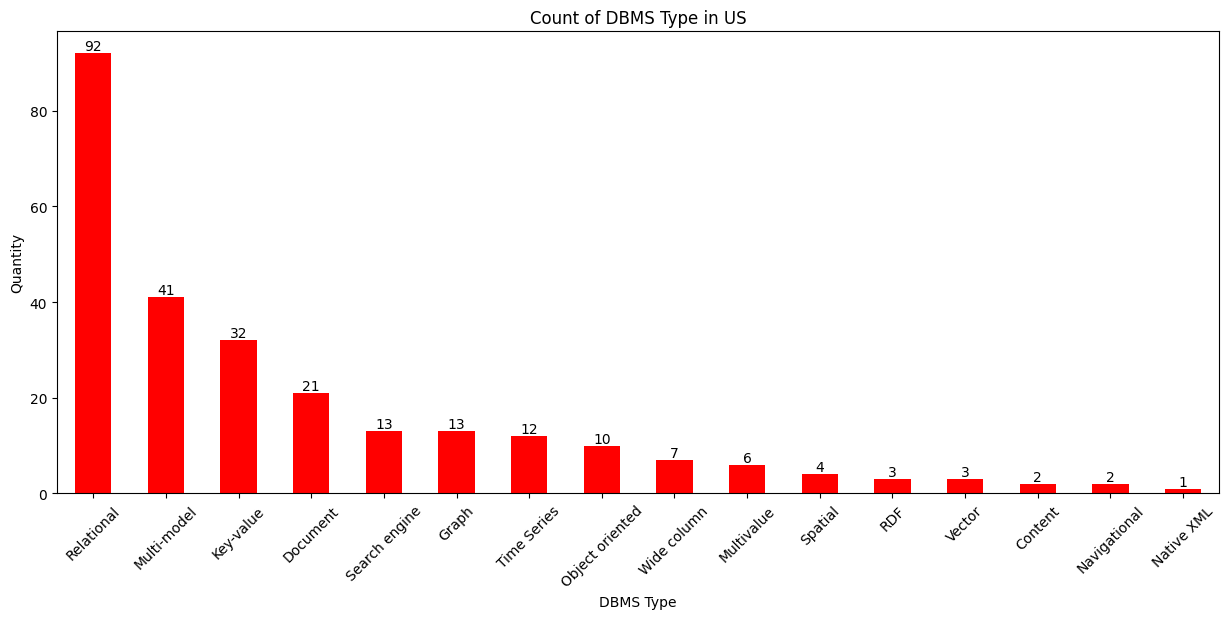

In [30]:
df_us = df[df['Vendor_Country'] == 'United States']
dbms_countsforus = df_us['DBMS_Type'].value_counts()

plt.figure(figsize=(15,6))
dbms_countsforus.plot(kind='bar', color='red')
plt.title('Count of DBMS Type in US')
plt.xlabel('DBMS Type')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

for index, value in enumerate(dbms_countsforus):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show();

To discover which is the most popular vendor in US, let's do some evalutaion:

In [31]:
vendorsinus = pd.DataFrame(df_us['Vendor_Name'].value_counts()) 
print("Quantity of usage of the most popular vendor in US:", vendorsinus.iloc[0, 0])

Quantity of usage of the most popular vendor in US: 23


Another evaluation is to check the % of DBMS model in US

In [32]:
modeltype = df_us['Multi_model_capability'].value_counts()

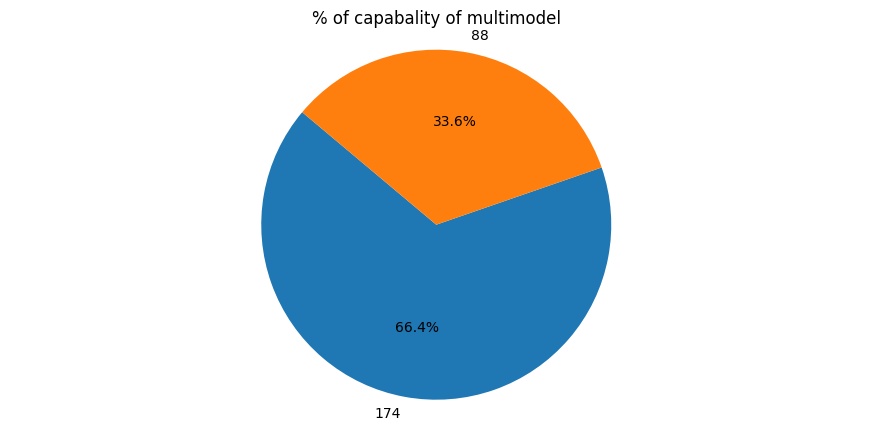

In [33]:

plt.figure(figsize=(11,5))
plt.pie(modeltype, labels=modeltype, autopct=lambda pct: '{:.1f}%'.format(pct), startangle=140)
plt.title("% of capabality of multimodel")
plt.axis('equal')
plt.show()

Machine Learning - Clustering with Euclidian 


The first thing is to choose the metric values from the dataframe. I created a new one called scorepoints only with Score_Feb_2024 and Score_Jan_2024


In [34]:
scorepoints = df[['Score_Feb_2024','Score_Jan_2024']]

Applying the euclidian distribution to the scorepoints

In [35]:
dist_euclidiana = pdist(scorepoints, metric='euclidean')

Now it is the plot of the Dendogram:

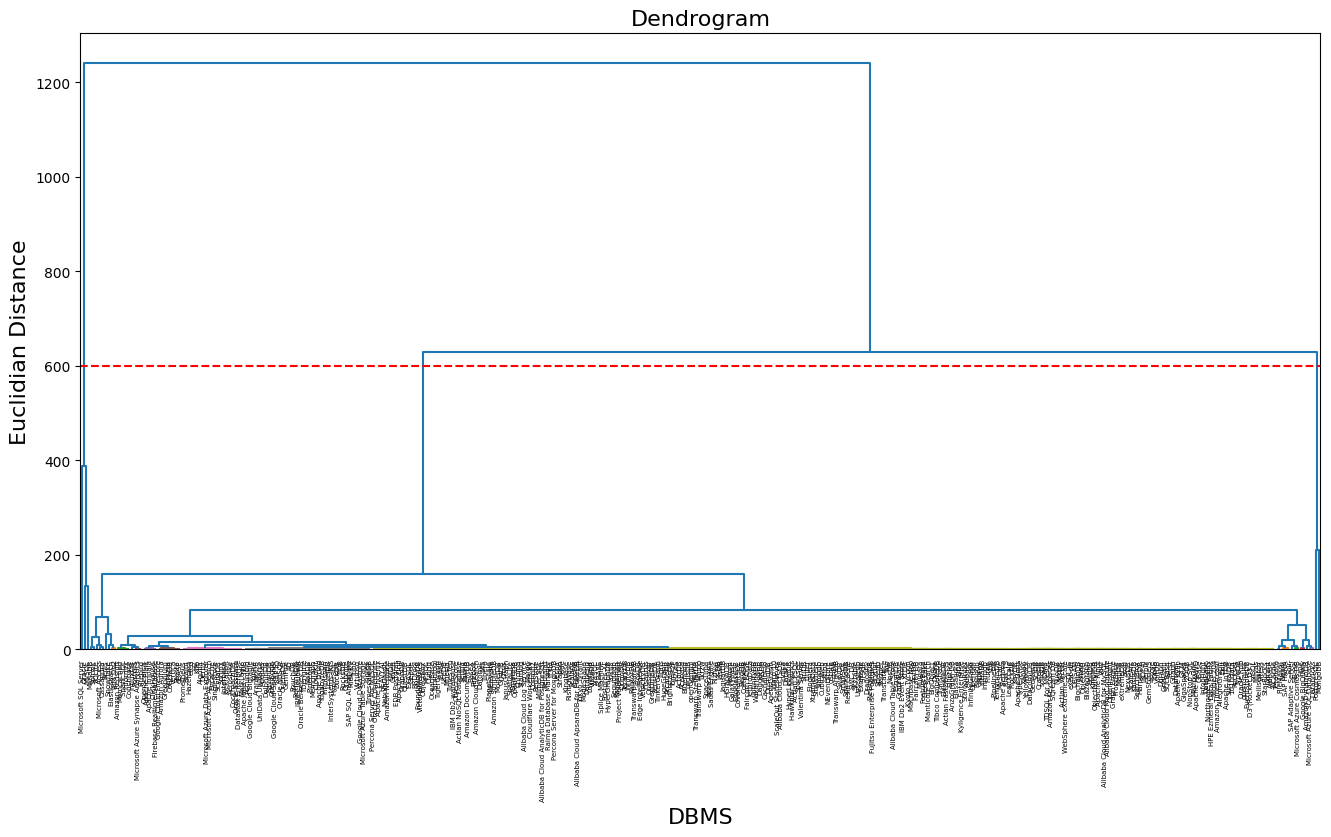

In [36]:
plt.figure(figsize=(16,8))
dend_disteuclid = sch.linkage(scorepoints, method = 'complete', metric = 'euclidean')
den_diseucluds = sch.dendrogram(dend_disteuclid, color_threshold = 4.5, labels = list(df.DBMS))
plt.title('Dendrogram', fontsize=16)
plt.xlabel('DBMS', fontsize=16)
plt.ylabel('Euclidian Distance', fontsize=16)
plt.axhline(y = 600, color = 'red', linestyle = '--')
plt.show()


With the below graph, we could see 3 clusters created above the red line. The position of the red line is define right after the first division of the cluster 

Now, I'm adding the new "cluster" variable in the original dataframe.

In [37]:
clusters_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
indicating_cluster_sing = clusters_sing.fit_predict(scorepoints)
df['cluster_complete'] = indicating_cluster_sing
df['cluster_complete'] = df['cluster_complete'].astype('category')

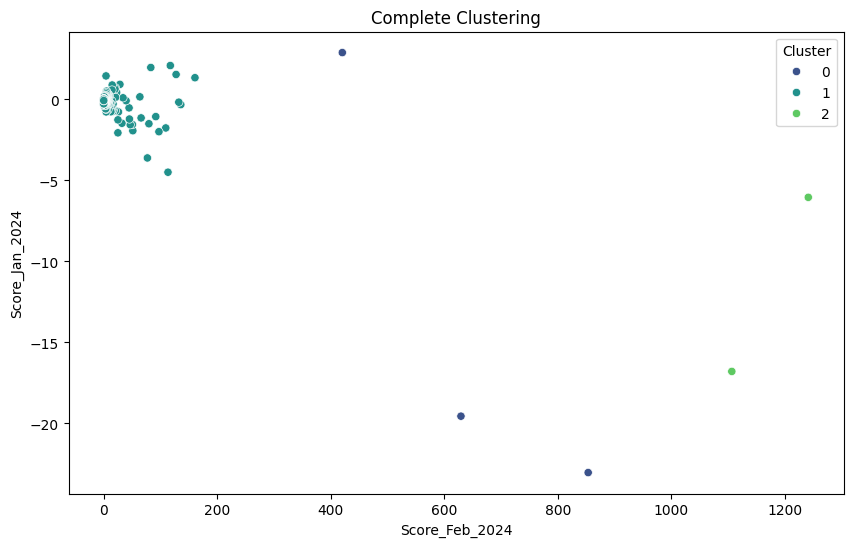

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Score_Feb_2024', y='Score_Jan_2024', hue='cluster_complete', palette='viridis')
plt.title('Complete Clustering')
plt.xlabel('Score_Feb_2024')
plt.ylabel('Score_Jan_2024')
plt.legend(title='Cluster')
plt.show()

With the previous image, we can see the scatter plot distribution of the clusters.

Creating a variable to plot the quantity of observations by cluster.

In [39]:
cluster_complete_column = df['cluster_complete'].value_counts()

Barplot


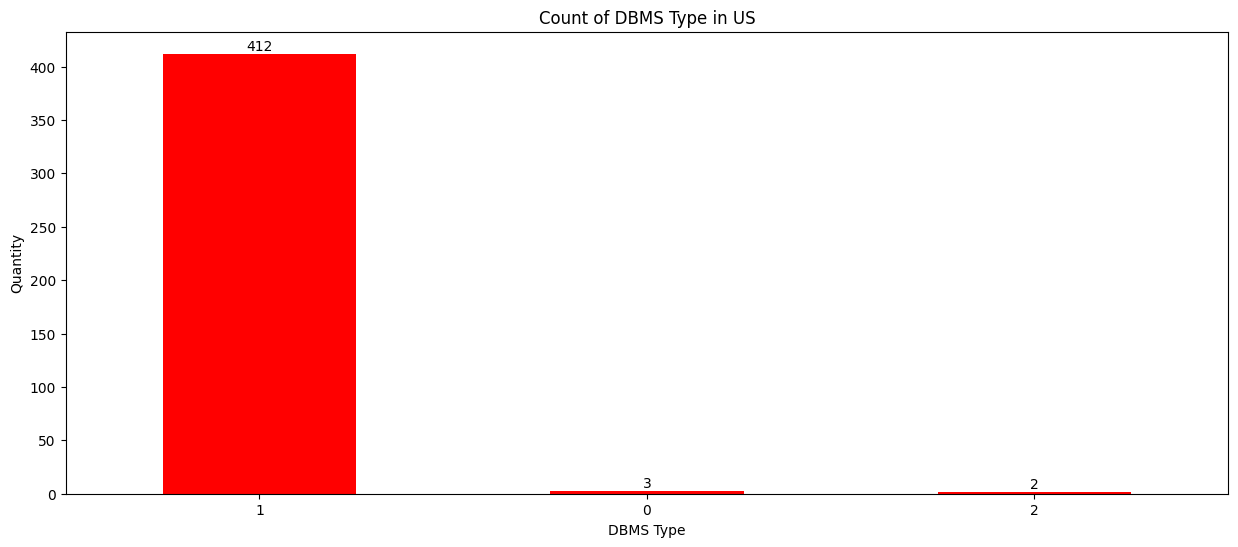

In [40]:
plt.figure(figsize=(15,6))
cluster_complete_column.plot(kind='bar', color='red')
plt.title('Count of DBMS Type in US')
plt.xlabel('DBMS Type')
plt.ylabel('Quantity')
plt.xticks(rotation=360)

for index, value in enumerate(cluster_complete_column):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show();

With the above information, the analysis indicate that a clustering for this type of data is not needed due there is not so much difference between the observations if the scores from Jan and Feb from 2024 were used to cluster.

Machine Learning - Correspondancy Analysis for two categorical variables.

With the currentdataframe, it is possible to see seome categorical variables

In [41]:
df.head()

,Sno,DBMS,Vendor_Name,Vendor_Country,DBMS_Type,Multi_model_capability,Score_Feb_2024,Score_Jan_2024,Score_Feb_2023,Rank_Feb_2024,cluster_complete
0,1,Oracle,Oracle Corporation,United States,Relational,Yes,1241.45,-6.05,-6.08,1.0,2
1,2,MySQL,Oracle Corporation,United States,Relational,Yes,1106.67,-16.79,-88.78,2.0,2
2,3,Microsoft SQL Server,Microsoft Corporation,United States,Relational,Yes,853.57,-23.03,-75.52,3.0,0
3,4,PostgreSQL,PostgreSQL Global Development Group,United States,Relational,Yes,629.41,-19.55,12.90,4.0,0
4,5,MongoDB,"MongoDB, Inc.",United States,Document,Yes,420.36,2.88,-32.41,5.0,0


Some questions are raised:
- Is there any correlation between Vendor_country and DBMS_type?
- Is there any correlation between multi-model capability and DBMS_type?

In [42]:
#value counts for variables
print(df['Vendor_Country'].value_counts())
print(df['Multi_model_capability'].value_counts())
print(df['DBMS_Type'].value_counts())

Vendor_Country
United States                   262
China                            35
International\n(Open Source)     32
Germany                          20
United Kingdom                   12
France                            9
Russia                            7
Japan                             6
Israel                            5
South Korea                       5
Netherlands                       4
Sweden                            4
Switzerland                       2
Canada                            2
Italy                             2
Ireland                           2
Spain                             2
Finland                           1
Bulgaria                          1
Croatia                           1
Australia                         1
New Zealand                       1
India                             1
Name: count, dtype: int64
Multi_model_capability
No     285
Yes    132
Name: count, dtype: int64
DBMS_Type
Relational         143
Multi-model         55
Key-

For this type of method, we must creat the contingency table.


In [43]:
table1 = pd.crosstab(df['Vendor_Country'], df['DBMS_Type'])
table1

DBMS_Type,Content,Document,Event,Graph,Key-value,Multi-model,Multivalue,Native XML,Navigational,Object oriented,RDF,Relational,Search engine,Spatial,Time Series,Vector,Wide column
Vendor_Country,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Bulgaria,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
China,0,0,0,3,2,2,0,0,0,0,0,18,2,0,5,2,1
Croatia,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Finland,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
France,0,0,0,0,0,0,0,0,0,2,0,3,1,0,2,0,1
Germany,0,1,0,0,2,2,2,2,0,1,0,9,1,0,0,0,0
India,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [44]:
table2 = pd.crosstab(df['Multi_model_capability'], df['DBMS_Type'])
table2

DBMS_Type,Content,Document,Event,Graph,Key-value,Multi-model,Multivalue,Native XML,Navigational,Object oriented,RDF,Relational,Search engine,Spatial,Time Series,Vector,Wide column
Multi_model_capability,,,,,,,,,,,,,,,,,
No,2,24,2,19,42,0,10,3,2,14,11,103,13,2,25,8,5
Yes,0,6,0,1,6,55,0,0,0,2,0,40,6,4,7,0,5


For this method, we must check the statistical significancy of the association with Qui Square test
 

In [51]:
SquareQuiTable1 = chi2_contingency(table1)
SquareQuiTable2 = chi2_contingency(table2)

print(f"Qui2 Table1: {round(SquareQuiTable1[0], 2)}")
print(f"Pvalue Table1: {round(SquareQuiTable1[1], 4)}")
print(f"Degrees of Freedom Table1: {SquareQuiTable1[2]}")

print(f"Qui2 Table2: {round(SquareQuiTable2[0], 2)}")
print(f"Pvalue Table2: {round(SquareQuiTable2[1], 4)}")
print(f"Degrees of Freedom Table2: {SquareQuiTable2[2]}")


Qui2 Table1: 387.76
Pvalue Table1: 0.0919
Degrees of Freedom Table1: 352
Qui2 Table2: 162.92
Pvalue Table2: 0.0
Degrees of Freedom Table2: 16


Based on the previous results, we could see that there are association between the categories, for the both situations. We reject H1 and accept H0

Creating the table1 with the "Adjusted standardized residuals"


In [53]:
#Creating the function
Tab_cont1 = sm.stats.Table(table1)

#Printing the table with expected frequency
print(Tab_cont1.fittedvalues)

DBMS_Type                      Content   Document     Event      Graph  \
Vendor_Country                                                           
Australia                     0.207080   0.605310  0.199115   0.453982   
Bulgaria                      0.207080   0.605310  0.199115   0.453982   
Canada                        0.218584   0.638938  0.210177   0.479204   
China                         0.908850   2.656637  0.873894   1.992478   
Croatia                       0.207080   0.605310  0.199115   0.453982   
Finland                       0.207080   0.605310  0.199115   0.453982   
France                        0.345133   1.008850  0.331858   0.756637   
Germany                       0.563717   1.647788  0.542035   1.235841   
India                         0.207080   0.605310  0.199115   0.453982   
International\n(Open Source)  0.828319   2.421239  0.796460   1.815929   
Ireland                       0.218584   0.638938  0.210177   0.479204   
Israel                        0.264602

In [55]:
#To create the residual values table, we must take the difference from the original table to the expected frequency table
print(table1 - Tab_cont1.fittedvalues)

DBMS_Type                      Content  Document     Event     Graph  \
Vendor_Country                                                         
Australia                    -0.207080 -0.605310 -0.199115 -0.453982   
Bulgaria                     -0.207080 -0.605310 -0.199115 -0.453982   
Canada                       -0.218584 -0.638938 -0.210177 -0.479204   
China                        -0.908850 -2.656637 -0.873894  1.007522   
Croatia                      -0.207080 -0.605310 -0.199115  0.546018   
Finland                      -0.207080 -0.605310 -0.199115 -0.453982   
France                       -0.345133 -1.008850 -0.331858 -0.756637   
Germany                      -0.563717 -0.647788 -0.542035 -1.235841   
India                        -0.207080 -0.605310 -0.199115 -0.453982   
International\n(Open Source) -0.828319  1.578761  0.203540 -0.815929   
Ireland                      -0.218584 -0.638938 -0.210177  0.520796   
Israel                       -0.264602  0.226549 -0.254425 -0.58

In [57]:
#Now, we must create the table with the standardized resids:
print(Tab_cont1.standardized_resids)

DBMS_Type                      Content  Document     Event     Graph  \
Vendor_Country                                                         
Australia                     0.656481 -0.141282  0.687374  0.070653   
Bulgaria                      0.656481 -0.141282  0.687374  0.070653   
Canada                        0.614153 -0.181507  0.644734  0.031092   
China                        -0.449894 -1.420587 -0.419387  0.759513   
Croatia                       0.656481 -0.141282  0.687374  0.838327   
Finland                       0.656481 -0.141282  0.687374  0.070653   
France                        0.270311 -0.531665  0.299157 -0.306872   
Germany                      -0.087782 -0.534229 -0.059032 -0.694494   
India                         0.656481 -0.141282  0.687374  0.070653   
International\n(Open Source) -0.377179  1.085708  0.238354 -0.642153   
Ireland                       0.614153 -0.181507  0.644734  0.778627   
Israel                        0.467764  0.269482  0.497426 -0.10

Doing the same thing with table2

In [58]:
#Creating the function
Tab_cont2 = sm.stats.Table(table2)

#Printing the table with expected frequency
print(Tab_cont2.fittedvalues)

DBMS_Type                Content   Document     Event      Graph  Key-value  \
Multi_model_capability                                                        
No                      1.695368  20.344418  1.695368  13.562945  32.551069   
Yes                     0.804632   9.655582  0.804632   6.437055  15.448931   

DBMS_Type               Multi-model  Multivalue  Native XML  Navigational  \
Multi_model_capability                                                      
No                        37.637173    7.120546    2.373515      1.695368   
Yes                       17.862827    3.379454    1.126485      0.804632   

DBMS_Type               Object oriented       RDF  Relational  Search engine  \
Multi_model_capability                                                         
No                            10.850356  7.798694   96.975059      12.884798   
Yes                            5.149644  3.701306   46.024941       6.115202   

DBMS_Type                Spatial  Time Series    Vect

In [60]:
print(table2 - Tab_cont2.fittedvalues)

DBMS_Type                Content  Document     Event     Graph  Key-value  \
Multi_model_capability                                                      
No                      0.304632  3.655582  0.304632  5.437055   9.448931   
Yes                    -0.804632 -3.655582 -0.804632 -5.437055  -9.448931   

DBMS_Type               Multi-model  Multivalue  Native XML  Navigational  \
Multi_model_capability                                                      
No                       -37.637173    2.879454    0.626485      0.304632   
Yes                       37.137173   -3.379454   -1.126485     -0.804632   

DBMS_Type               Object oriented       RDF  Relational  Search engine  \
Multi_model_capability                                                         
No                             3.149644  3.201306    6.024941       0.115202   
Yes                           -3.149644 -3.701306   -6.024941      -0.115202   

DBMS_Type                Spatial  Time Series    Vector  Wide

In [68]:
print(Tab_cont2.standardized_resids)

DBMS_Type                Content  Document     Event    Graph  Key-value  \
Multi_model_capability                                                     
No                      0.413626  1.482375  0.413626  2.66641   3.101402   
Yes                    -0.413626 -1.482375 -0.413626 -2.66641  -3.101402   

DBMS_Type               Multi-model  Multivalue  Native XML  Navigational  \
Multi_model_capability                                                      
No                       -11.451677    1.926235    0.719778      0.413626   
Yes                       11.451677   -1.926235   -0.719778     -0.413626   

DBMS_Type               Object oriented       RDF  Relational  Search engine  \
Multi_model_capability                                                         
No                               1.7184  2.048811    1.327128       0.057892   
Yes                             -1.7184 -2.048811   -1.327128      -0.057892   

DBMS_Type                Spatial  Time Series    Vector  Wide col

After creating the tables with residual values, we must create the ANACOR.

In [69]:
ca1 = prince.CA().fit(table1)

In [70]:
#Extracting the autovalues
table1_autovalues = ca1.eigenvalues_summary
print(table1_autovalues)



          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.202        21.70%                     21.70%
1              0.140        15.03%                     36.73%


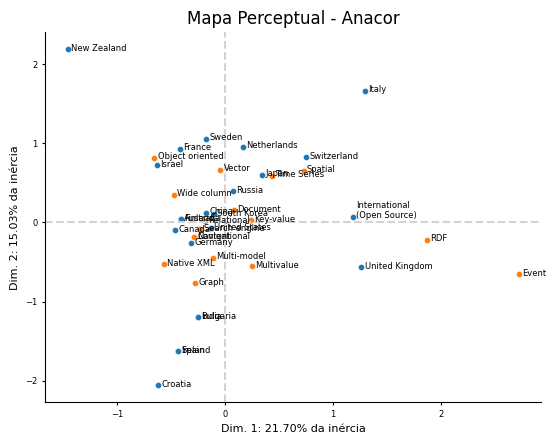

In [74]:
chart_df_row1 = pd.DataFrame({'var_row': table1.index,
                             'x_row':ca1.row_coordinates(table1)[0].values,
                             'y_row': ca1.row_coordinates(table1)[1].values})

chart_df_col1 = pd.DataFrame({'var_col': table1.columns,
                             'x_col':ca1.column_coordinates(table1)[0].values,
                             'y_col': ca1.column_coordinates(table1)[1].values})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=6)

label_point(x = chart_df_col1['x_col'],
            y = chart_df_col1['y_col'],
            val = chart_df_col1['var_col'],
            ax = plt.gca())

label_point(x = chart_df_row1['x_row'],
            y = chart_df_row1['y_row'],
            val = chart_df_row1['var_row'],
            ax = plt.gca()) 

sns.scatterplot(data=chart_df_row1, x='x_row', y='y_row', s=20)
sns.scatterplot(data=chart_df_col1, x='x_col', y='y_col', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--')
plt.axvline(x=0, color='lightgrey', ls='--')
plt.tick_params(size=2, labelsize=6)
plt.title("Mapa Perceptual - Anacor", fontsize=12)
plt.xlabel(f"Dim. 1: {table1_autovalues.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {table1_autovalues.iloc[1,1]} da inércia", fontsize=8)
plt.show()

Doing the samething for Table2

In [81]:
ca2 = prince.CA().fit(table2)

In [82]:
#Extracting the autovalues
table2_autovalues = ca2.eigenvalues_summary
print(table2_autovalues)


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.391       100.00%                    100.00%


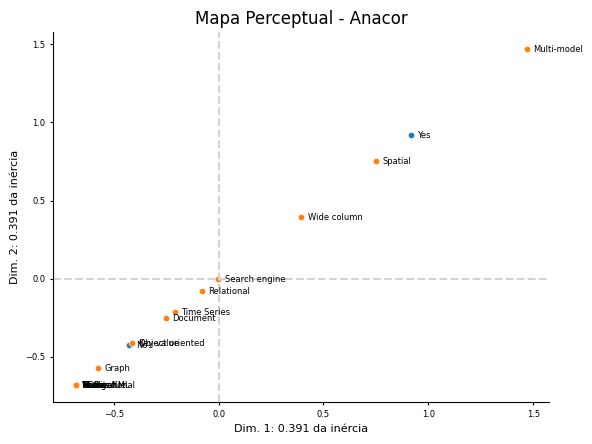

In [86]:
chart_df_row2 = pd.DataFrame({'var_row': table2.index,
                             'x_row': ca2.row_coordinates(table2)[0].values,
                             'y_row': ca2.row_coordinates(table2)[0].values})

chart_df_col2 = pd.DataFrame({'var_col': table2.columns,
                             'x_col': ca2.column_coordinates(table2)[0].values,
                             'y_col': ca2.column_coordinates(table2)[0].values})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=6)

label_point(x = chart_df_col2['x_col'],
            y = chart_df_col2['y_col'],
            val = chart_df_col2['var_col'],
            ax = plt.gca())

label_point(x = chart_df_row2['x_row'],
            y = chart_df_row2['y_row'],
            val = chart_df_row2['var_row'],
            ax = plt.gca()) 

sns.scatterplot(data=chart_df_row2, x='x_row', y='y_row', s=20)
sns.scatterplot(data=chart_df_col2, x='x_col', y='y_col', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--')
plt.axvline(x=0, color='lightgrey', ls='--')
plt.tick_params(size=2, labelsize=6)
plt.title("Mapa Perceptual - Anacor", fontsize=12)
plt.xlabel(f"Dim. 1: {table2_autovalues.iloc[0,0]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {table2_autovalues.iloc[0,0]} da inércia", fontsize=8)
plt.show()